In [1]:
import pandas as pd
import seaborn as sb
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
datos = pd.read_csv('./altura_peso_edad.csv')
datos.head(10)

,Altura,Peso,Edad
0,1.82,88,57
1,1.75,78,40
2,1.80,76,37
3,1.70,68,55
4,1.68,65,63
5,1.75,72,50
6,1.85,80,27
7,1.70,65,52
8,1.82,90,65
9,1.67,60,47


In [5]:
# Prepararamos los datos para el primer modelo (solo altura).
X = datos[['Altura', 'Edad']].values
y = datos['Peso'].values

# Dividimos los datos en 75% entrenamiento y 25% prueba.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Creamos el modelo de regresión lineal.
modelo = LinearRegression()
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X)

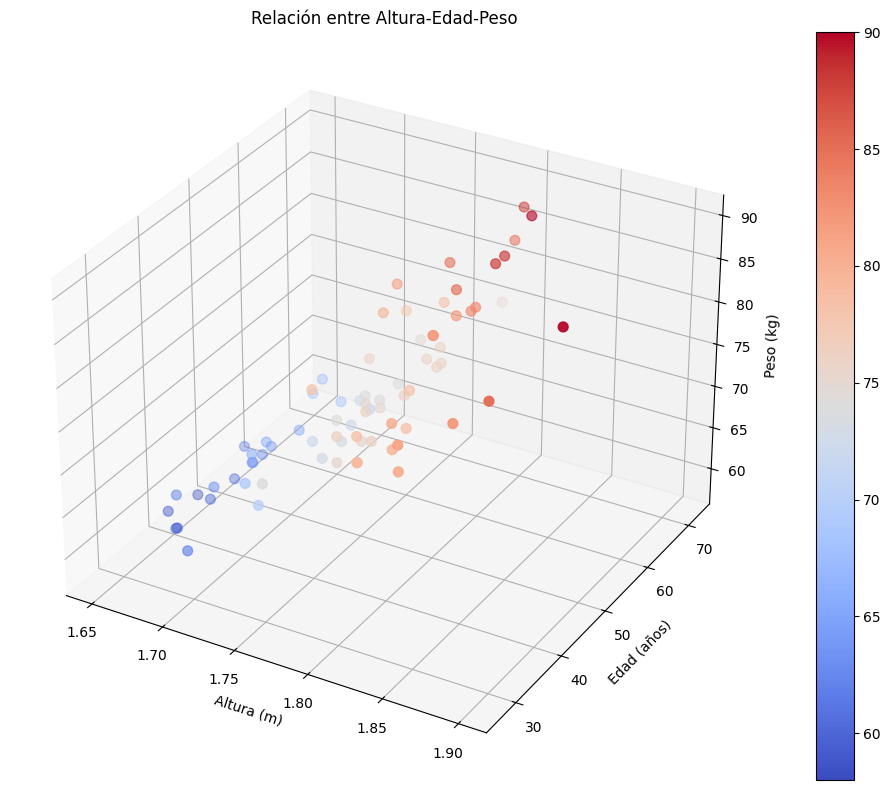

In [7]:
# Creamos una visualización 3D para mostrar la relación entre las variables
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(datos['Altura'],
                    datos['Edad'],
                    datos['Peso'],
                    c=datos['Peso'],
                    cmap='coolwarm',
                    s=50)

ax.set_xlabel('Altura (m)')
ax.set_ylabel('Edad (años)')
ax.set_zlabel('Peso (kg)')
plt.colorbar(scatter)
plt.title('Relación entre Altura-Edad-Peso')
plt.tight_layout()
plt.show()

In [35]:
AlturaErnestinaCantarero = 1.54
EdadErnestinaCanterero = 42
prediccionPeso = modelo.predict([[AlturaErnestinaCantarero, EdadErnestinaCanterero]])
print(f"La altura de Ernestina Cantarero es {AlturaErnestinaCantarero} m, su edad son {EdadErnestinaCanterero} años y su peso aprox. de ella es {prediccionPeso} kg.")

La altura de Ernestina Cantarero es 1.54 m, su edad son 42 años y su peso aprox. de ella es [43.58618446] kg.


In [39]:
AlturaEvelynRauda = 1.53
EdadEvelynRauda = 27
prediccionPeso = modelo.predict([[AlturaEvelynRauda, EdadEvelynRauda]])
print(f"La altura de Evelyn Rauda es {AlturaEvelynRauda} m, su edad son {EdadEvelynRauda} años y su peso aprox. de ella es {prediccionPeso} kg.")

La altura de Evelyn Rauda es 1.53 m, su edad son 27 años y su peso aprox. de ella es [39.03349026] kg.


In [37]:
AlturaLilyCollins = 1.65
EdadLilyCollins = 35
prediccionPeso = modelo.predict([[AlturaLilyCollins, EdadLilyCollins]])
print(f"La altura de Lily Collins es {AlturaLilyCollins} m, su edad son {EdadLilyCollins} años y su peso aprox. de ella es {prediccionPeso} kg.")

La altura de Lily Collins es 1.65 m, su edad son 35 años y su peso aprox. de ella es [56.75306694] kg.


In [41]:
AlturaDonaldTrump  = 1.9
EdadDonaldTrump = 78
prediccionPeso = modelo.predict([[AlturaDonaldTrump, EdadDonaldTrump]])
print(f"La altura de Donald Trump es {AlturaDonaldTrump} m, su edad son {EdadDonaldTrump} años y su peso aprox. de él es {prediccionPeso} kg.")

La altura de Donald Trump es 1.9 m, su edad son 78 años y su peso aprox. de él es [99.3202229] kg.


In [11]:
modelo.score(X_train, y_train) # Puntaje del modelo.

0.8963966687439552

In [12]:
print(f"Peso: {modelo.coef_}")
print(f"Sesgo: {modelo.intercept_}")

Peso: [133.35587011   0.21460903]
Sesgo: -170.79543491210484


**El puntaje del nuevo modelo superó al de Peso-Altura no con una amplia diferencia pero sí muy significativa. Al parecer el agregar la edad hizo que el modelo correlacionara mejor las características. Con respecto a los datos reales, Ernestina pesa 48.0808 kg y la predicción nueva se alejó un poco con 43.58618446 kg, en cambio con Evelyn su peso es de 82.1002 kg y el modelo lanzó 39.03349026 kg este dato marca una predicción deficiente. Luego, evaluamos datos de famosos, en el caso de Lily Collins su peso es de 54 kg y la predicción fue 56.75306694 muy cerca y por último Donald Trump el peso de él es de 98 kg y el resultado fue 99.3202229 kg. Esto sugiere que si bien mejoró en términos generales, su precisión varía según cada individuo.**